In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("sales_data_sample.csv", encoding = "latin1")
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
X = data[["QUANTITYORDERED", "PRICEEACH", "SALES", "MSRP"]]

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
wcss = []  # Within-cluster sum of squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

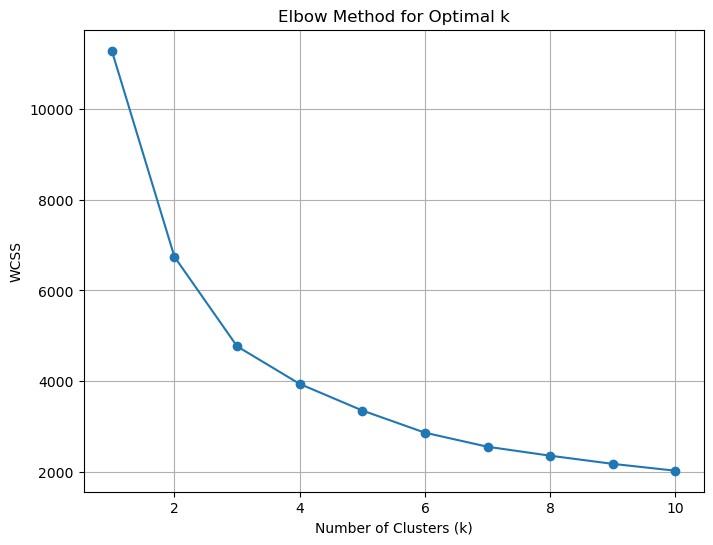

In [6]:
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

In [8]:
data[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP', 'Cluster']].head()

,QUANTITYORDERED,PRICEEACH,SALES,MSRP,Cluster
0,30,95.70,2871.00,95,2
1,34,81.35,2765.90,95,2
2,41,94.74,3884.34,95,3
3,45,83.26,3746.70,95,3
4,49,100.00,5205.27,95,1


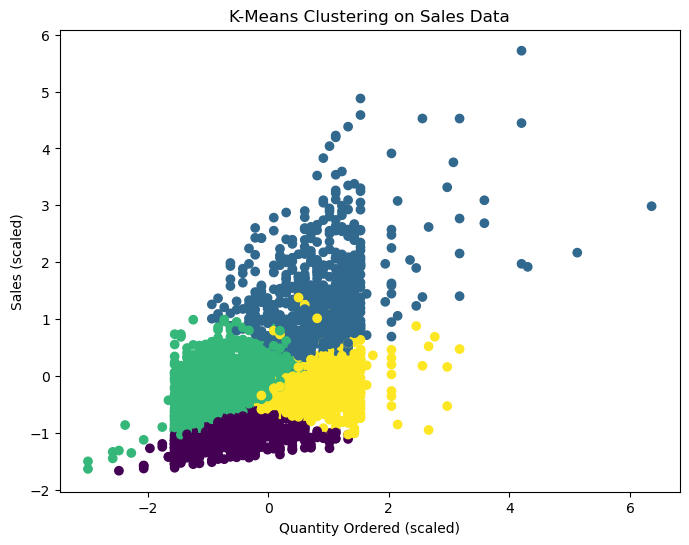

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering on Sales Data')
plt.xlabel('Quantity Ordered (scaled)')
plt.ylabel('Sales (scaled)')
plt.show()